In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Parameter windowing
input_width = 48
label_width = 48
shift = label_width
total_window_size = input_width + shift
OUT_STEPS = label_width
# Definisikan irisan untuk input dan label
input_slice = slice(0, input_width)
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)

from A_template import  scale_array, inverse_scale_array, make_windows, process_predictions, compute_metrics, compute_error

In [3]:
data= pd.read_excel('D:\\KULIAH S2\\Komputasi Lanjut\\TIMESERIES_CODE\\ANN\\cuaca_bebanLR5_v2.xlsx', index_col=0)
data

,Beban,Hari_Khus,Jam_sin,Jam_cos,Hari_sin,Hari_cos,Hari_Khus_sin,Hari_Khus_cos,Tanggal_sin,Tanggal_cos,Bulan_sin,Bulan_cos
Date,,,,,,,,,,,,
2023-02-12 00:30:00,20312.00,0,0.130526,0.991445,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 01:00:00,20180.00,0,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 01:30:00,20021.00,0,0.382683,0.923880,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 02:00:00,19906.00,0,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 02:30:00,19743.00,0,0.608761,0.793353,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,21241.27,0,-0.500000,0.866025,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025
2023-12-31 22:30:00,20800.42,0,-0.382683,0.923880,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025
2023-12-31 23:00:00,20450.02,0,-0.258819,0.965926,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025


In [4]:
df1=data.copy()
beban_scaled, beban_min, beban_max  =scale_array(df1['Beban'].values)
df1['Beban']=beban_scaled
input_make_windows=df1.drop(columns=["Beban"]).to_numpy()
output_make_windows=df1['Beban'].to_numpy()
x,y=make_windows(input_make_windows, output_make_windows,total_window_size, input_slice, labels_slice)

In [6]:
beban_min

14280.72

In [7]:
beban_max

31455.09

In [5]:
df1

,Beban,Hari_Khus,Jam_sin,Jam_cos,Hari_sin,Hari_cos,Hari_Khus_sin,Hari_Khus_cos,Tanggal_sin,Tanggal_cos,Bulan_sin,Bulan_cos
Date,,,,,,,,,,,,
2023-02-12 00:30:00,-0.297642,0,0.130526,0.991445,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 01:00:00,-0.313014,0,0.258819,0.965926,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 01:30:00,-0.331529,0,0.382683,0.923880,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 02:00:00,-0.344922,0,0.500000,0.866025,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
2023-02-12 02:30:00,-0.363903,0,0.608761,0.793353,-0.781831,0.62349,0.0,1.0,7.431448e-01,-0.669131,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 22:00:00,-0.189426,0,-0.500000,0.866025,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025
2023-12-31 22:30:00,-0.240764,0,-0.382683,0.923880,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025
2023-12-31 23:00:00,-0.281569,0,-0.258819,0.965926,-0.781831,0.62349,0.0,1.0,-2.449294e-16,1.000000,-0.5,0.866025


In [13]:
# Load the model
import tensorflow as tf
model =tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 11)),  # 48 timesteps, 11 features per timestep
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128, activation='tanh')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(128, activation='tanh')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1)),  # One prediction per timestep
    tf.keras.layers.Reshape((48,))  # Reshape output from (batch, 48, 1) to (batch, 48)
])
# model = tf.keras.models.load_model('model_td_2.h5')
model.load_weights('model_td_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_3 (TimeDis  (None, 48, 128)          1536      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 48, 128)          16512     
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 48, 1)            129       
 tributed)                                                       
                                                                 
 reshape_1 (Reshape)         (None, 48)                0         
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
__________________________________________________

In [ ]:
df_pred_act = compute_error(x, data['Beban'], ['Beban'], model, input_width,label_width, beban_min, beban_max)
df_pred_act

11/11 [==============================] - 0s 608us/step
MAE: 657.8490020208576, MAPE %: 2.6465848725805894, MSE: 932576.4782499094, RMSE: 965.6999939162831


,Prediksi,Aktual
Date,,
2023-02-13 00:30:00,20569.488281,19244.00
2023-02-13 01:00:00,20175.570312,19141.00
2023-02-13 01:30:00,19882.238281,18943.00
2023-02-13 02:00:00,19680.203125,18862.00
2023-02-13 02:30:00,19564.324219,18639.00
...,...,...
2023-12-31 22:00:00,24171.933594,21241.27
2023-12-31 22:30:00,23541.363281,20800.42
2023-12-31 23:00:00,23042.964844,20450.02


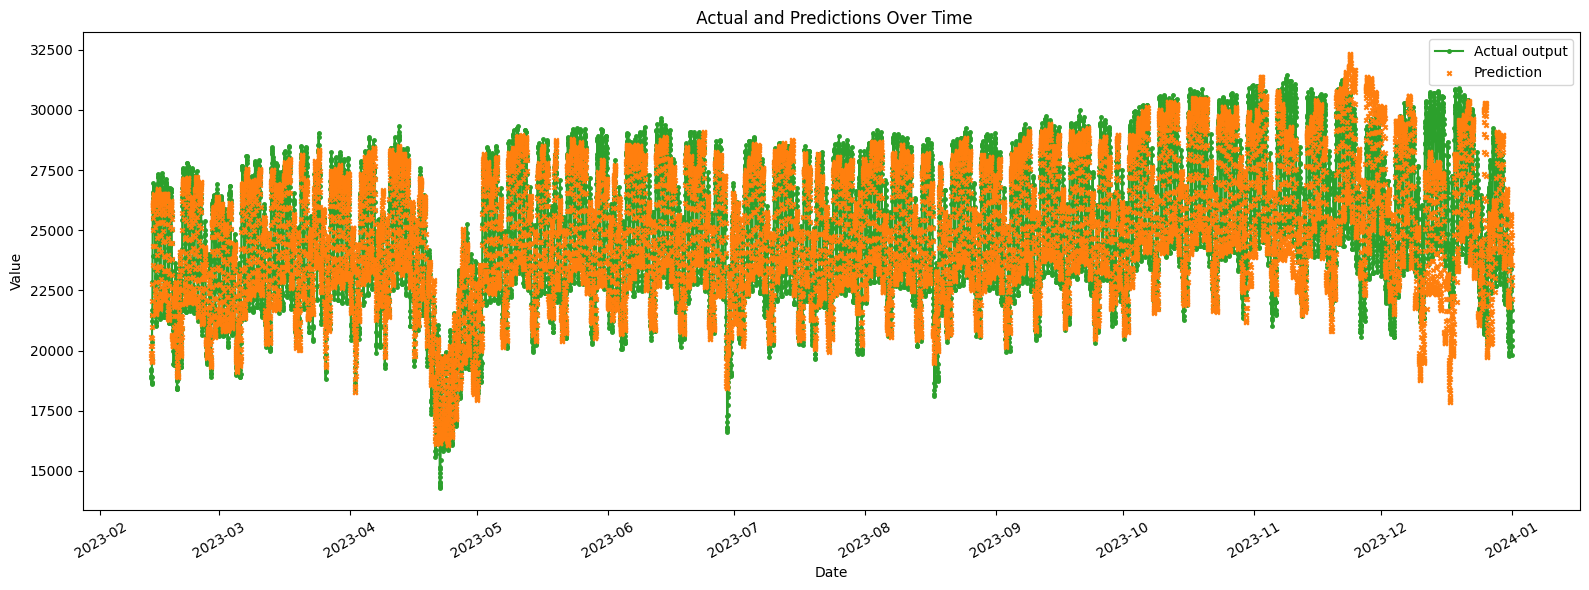

In [15]:
df= df_pred_act.copy()
plt.figure(figsize=(16, 6))

# Plot the "Actual" as a green line with dot markers
plt.plot(
    df.index, 
    df['Aktual'], 
    label='Actual output', 
    marker='.', 
    markersize=5, 
    color='#2ca02c', 
    zorder=-100
)

# Scatter plot for "Prediction" in orange X markers
plt.scatter(
    df.index, 
    df['Prediksi'], 
    marker='x', 
    #edgecolors='k', 
    label='Prediction', 
    c='#ff7f0e', 
    s=10
)


plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=30)
plt.title(' Actual and Predictions Over Time')
plt.tight_layout()
plt.show()
